# Monthly Forecast

['AI Platform' 'Architecture' 'Architecture.' 'Encompass'
 'Enterprise Architecture' 'Fabric' 'Fintech' 'NBV' 'Shared Tech' 'Data'
 'Data Platform' 'Data & Analytics' 'Fleet' 'AU PROD BackUp' 'Digital'
 'EFS' 'Factoring' 'Fleet AU (WFA)' 'Fleet EU (WFE)' 'IFCS' 'NA Fleet'
 'OMV' 'Permits' 'Pluto' 'WES' 'Funding' 'Wheel' 'Gateways' 'Auth Gateway'
 'GTS' 'AdminMaster' 'BackOffice' 'Control Tower' 'Core Services'
 'Custodian' 'Directory Services' 'Rimini' 'Secure Core' 'InfoSec'
 ' InfoSecurity' 'Payments' 'ARX' 'Bill Pay' 'Invapay' 'Payments Platform'
 'WEXGEN+' 'Platform' 'Risk' 'Risk Technology' 'RPA' 'RPA.' 'TAG' 'TAG.'
 'Travel' 'eNett' 'Optal' 'AI Platform.' ' Data Lake' 'T-Chek' 'Sawatch'
 'BeyondFuel' 'Chat GTS' 'Platform Tech' 'Payzer'
 'WEX Architecture Dev (158199044084)'
 'WEX One WEX Identity Stage (302263083637)'
 'WEX Architecture Prod (307920957960)'
 'WEX One WEX Identity Dev (692859917845)'
 'WEX One WEX Identity Prod (783764581055)'
 'WEX Architecture Stage (88454590640

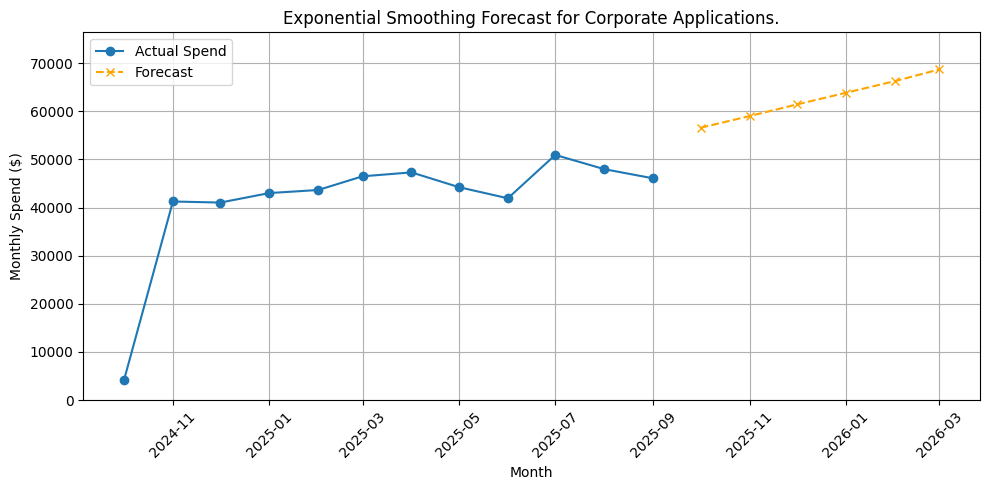


Forecasted Monthly Spend for next 6 months:
          ds        Forecast
0 2025-10-01 56599.187342904
1 2025-11-01 59021.865881322
2 2025-12-01 61444.544419741
3 2026-01-01 63867.222958160
4 2026-02-01 66289.901496579
5 2026-03-01 68712.580034997


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime
from statsmodels.tsa.holtwinters import ExponentialSmoothing


pd.set_option('display.float_format', lambda x: '%.9f' % x)
df_bus = pd.read_csv("Budgets Forecasting.csv")

all_bu_name = 'Wex-All Business Units'
all_bu_id = 1

all_bu_df = pd.read_csv("All BU Costs.csv")
all_bu_df['BUSINESS_UNIT_NAME'] = all_bu_name
all_bu_df['ROOT_BU_ID'] = all_bu_id
final_df = pd.concat(objs=[df_bus, all_bu_df], ignore_index=True)

current_month = int(datetime.datetime.now().strftime("%Y%m"))  
final_df = final_df[final_df["MONTH"] < current_month]

print(final_df.BUSINESS_UNIT_NAME.unique())

selected_bu = "Corporate Applications."
bu_df = final_df[final_df["BUSINESS_UNIT_NAME"] == selected_bu].copy().reset_index(drop=True)

bu_df["ds"] = pd.to_datetime(bu_df["MONTH"].astype(str) + "01", format="%Y%m%d")
bu_df = bu_df.sort_values("ds")

model = ExponentialSmoothing(
    bu_df["MONTHLY_SPENT"],
    trend="add",        
    seasonal=None,     
    initialization_method="estimated"
)
fit = model.fit(optimized=True)

forecast = fit.forecast(6)

forecast_df = pd.DataFrame({
    "ds": pd.date_range(bu_df["ds"].iloc[-1] + pd.offsets.MonthBegin(), periods=6, freq="MS"),
    "Forecast": forecast.values
})

# Plot
plt.figure(figsize=(10,5))
plt.plot(bu_df["ds"], bu_df["MONTHLY_SPENT"], marker='o', label="Actual Spend")
plt.plot(forecast_df["ds"], forecast_df["Forecast"], linestyle='--', marker='x', color='orange', label="Forecast")
plt.title(f"Exponential Smoothing Forecast for {selected_bu}")
plt.xlabel("Month")
plt.ylabel("Monthly Spend ($)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.ylim(0,bu_df["MONTHLY_SPENT"].max()*1.5)
plt.grid()
plt.show()

# Show forecasted values
print("\nForecasted Monthly Spend for next 6 months:")
print(forecast_df)